PART A :

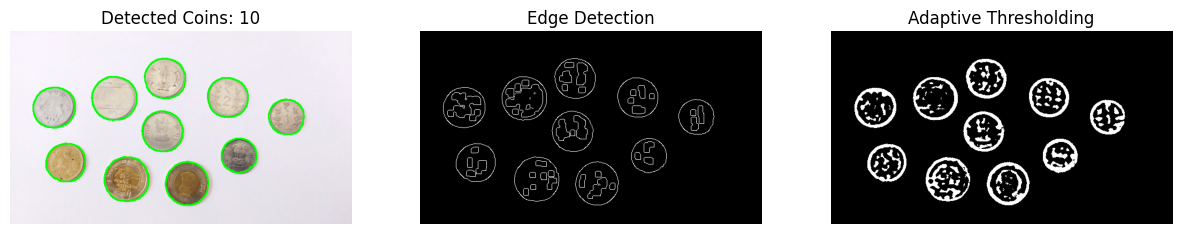

Total number of coins detected: 10


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **Step 1: Improve Contrast Using CLAHE**
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray)

# **Step 2: Apply GaussianBlur to Reduce Noise**
blurred = cv2.GaussianBlur(enhanced_gray, (15, 15), 0)

# **Step 3: Adaptive Thresholding for Better Edge Detection**
adaptive_thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# **Step 4: Morphological Operations to Close Gaps**
kernel = np.ones((5, 5), np.uint8)
morph = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# **Step 5: Edge Detection Using Canny**
edges = cv2.Canny(morph, 50, 150)

# **Step 6: Find Contours**
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# **Step 7: Draw Contours on the Original Image**
detected_coins = image.copy()
cv2.drawContours(detected_coins, contours, -1, (0, 255, 0), 2)

# **Step 8: Display Results Using Matplotlib**
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original Image with Detected Coins
axs[0].imshow(cv2.cvtColor(detected_coins, cv2.COLOR_BGR2RGB))
axs[0].set_title(f"Detected Coins: {len(contours)}")
axs[0].axis("off")

# Edge Detection Image
axs[1].imshow(edges, cmap="gray")
axs[1].set_title("Edge Detection")
axs[1].axis("off")

# Adaptive Thresholding Image
axs[2].imshow(adaptive_thresh, cmap="gray")
axs[2].set_title("Adaptive Thresholding")
axs[2].axis("off")

plt.show()

# Print Total Count
print(f"Total number of coins detected: {len(contours)}")


PART B:

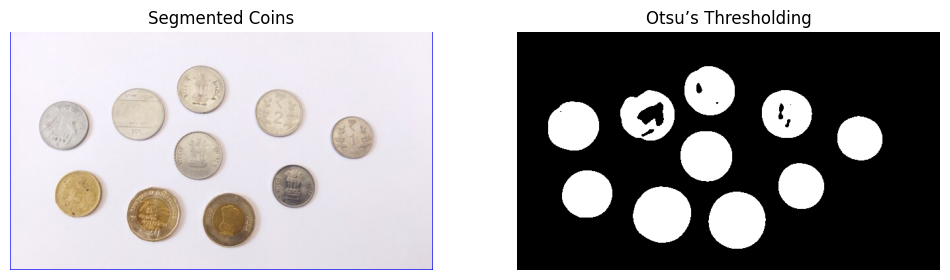

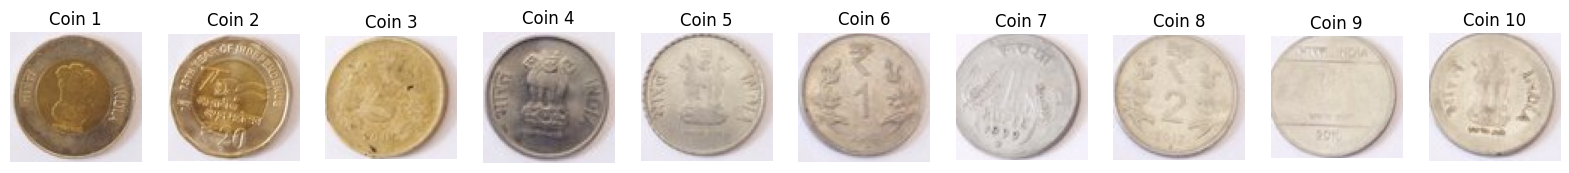

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **Step 1: Improve Contrast Using CLAHE**
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray)

# **Step 2: Apply Stronger GaussianBlur to Suppress Patterns**
blurred = cv2.GaussianBlur(enhanced_gray, (25, 25), 0)  # Increased kernel size

# **Step 3: Otsu’s Thresholding for Better Segmentation**
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# **Step 4: Morphological Operations to Remove Small Noise**
kernel = np.ones((5, 5), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

# **Step 5: Define Sure Background**
sure_bg = cv2.dilate(morph, kernel, iterations=3)

# **Step 6: Marker Labelling for Watershed Algorithm**
_, markers = cv2.connectedComponents(morph)
markers = markers + 1  # Background is labeled as 1

# **Step 7: Apply Watershed Algorithm**
segmented_image = image.copy()
cv2.watershed(segmented_image, markers)
segmented_image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# **Step 8: Find Contours and Filter Out Small Areas (Patterns Inside Coins)**
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]  # Ignore small patterns

# **Step 9: Extract and Display Each Coin Separately**
segmented_coins = []
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    coin = image[y:y+h, x:x+w]  # Crop each coin
    segmented_coins.append(coin)

# **Step 10: Display Results Using Matplotlib**
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Segmented Coins
axs[0].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Segmented Coins")
axs[0].axis("off")

# Otsu Thresholding Image
axs[1].imshow(thresh, cmap="gray")
axs[1].set_title("Otsu’s Thresholding")
axs[1].axis("off")

plt.show()

# **Display Each Segmented Coin Separately**
fig, axes = plt.subplots(1, len(segmented_coins), figsize=(20, 5))
for i, coin in enumerate(segmented_coins):
    axes[i].imshow(cv2.cvtColor(coin, cv2.COLOR_BGR2RGB))
    axes[i].axis("off")
    axes[i].set_title(f"Coin {i+1}")

plt.show()


PART C

Total number of coins detected: 10


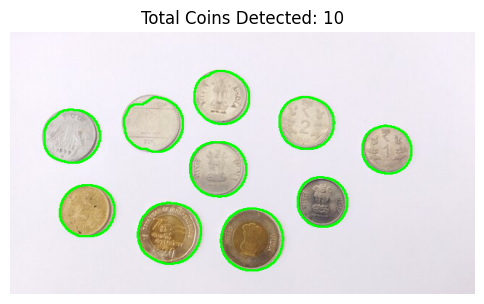

In [23]:
import cv2
import numpy as np

def count_coins(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # **Step 1: Improve Contrast Using CLAHE**
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_gray = clahe.apply(gray)

    # **Step 2: Apply Stronger GaussianBlur to Suppress Patterns**
    blurred = cv2.GaussianBlur(enhanced_gray, (25, 25), 0)  # Increased kernel size

    # **Step 3: Otsu’s Thresholding for Better Segmentation**
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # **Step 4: Morphological Operations to Remove Small Noise**
    kernel = np.ones((5, 5), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

    # **Step 5: Find Contours and Filter Out Small Areas (Patterns Inside Coins)**
    contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]  # Ignore small patterns

    # **Step 6: Count Total Coins**
    coin_count = len(filtered_contours)
    print(f"Total number of coins detected: {coin_count}")

    # **Step 7: Draw Contours on the Original Image**
    detected_coins = image.copy()
    cv2.drawContours(detected_coins, filtered_contours, -1, (0, 255, 0), 2)

    # **Step 8: Display the Processed Image with Count**
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(detected_coins, cv2.COLOR_BGR2RGB))
    plt.title(f"Total Coins Detected: {coin_count}")
    plt.axis("off")
    plt.show()

# **Run the Function**
count_coins("coins.jpg")
